# Lesson 3: Data Wrangling and Visualization

Today we're going to work on wrangling and visualizing data. We will be exploring the packages we've learned about earlier in this course: Pandas, NumPy, Matplotlib, and Seaborn.

We'll begin by importing the packages we need.

## Exercise 1 

Import each of the packages mentioned above.  

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# This line tells the notebook to display plots inline
%matplotlib inline

## Exercise 2

Import the 2016 City Service Request data we used in lesson 2. Use the os package to set the working directory.

In [2]:
import os
os.chdir('C:\\Users\\peter.casey\\Downloads') 

df = pd.read_csv('City_Service_Requests_in_2016.csv')

## Exercise 3 

Take a look at the data using some of the techniques you learned last week, including shape, head, and describe.

In [3]:
df.head().T

,0,1,2,3,4
﻿X,-77.0289,-77.0194,-77.0147,-77.004,-77.004
Y,38.9037,38.9416,38.9062,38.8359,38.8359
OBJECTID,947826,947827,947828,947829,947830
SERVICECODE,S0276,S0361,PRUNING,S0031,S0031
SERVICECODEDESCRIPTION,Parking Meter Repair,Sidewalk Repair,Tree Pruning,Bulk Collection,Bulk Collection
SERVICETYPECODEDESCRIPTION,Transportation Operations Administration,Toa-Street & Bridge Maintenance,Urban Forrestry,SWMA- Solid Waste Management Admistration,SWMA- Solid Waste Management Admistration
ORGANIZATIONACRONYM,DDOT,DDOT,DDOT,DPW,DPW
SERVICECALLCOUNT,1,1,1,1,1
ADDDATE,2016-05-02T11:43:31.000Z,2016-05-02T11:47:49.000Z,2016-05-02T10:44:23.000Z,2016-05-02T11:49:49.000Z,2016-05-02T11:49:50.000Z
RESOLUTIONDATE,2016-05-03T01:38:10.000Z,NaN,2017-01-19T11:03:08.000Z,2016-05-12T14:27:19.000Z,2016-05-12T14:26:24.000Z


Recall that last week we saw that date variables are stored as object data types in Pandas Data Frames.

However, we CAN turn them in to datetime types using Pandas's nifty datetime commands.

Let's begin by converting the service order date into a new datetime column in our DataFrame called "request_date".

In [4]:
df['request_date'] = pd.to_datetime(df['SERVICEORDERDATE'])

With any datetime object, we can use dt to pull the particulare date time that we're interested in.

Here we use the value_counts function to look at the data by month.

In [5]:
df.request_date.dt.month.value_counts()

1     34542
8     29892
9     26935
6     26253
7     25881
5     24289
10    24236
3     23892
4     23725
2     21541
11    20990
12    20809
Name: request_date, dtype: int64

Notice that January is the month in which the city received the most service requests. However, the other top months for service requests are all summer months, and our winter months (December, November, February) are those with the least service requests. Does January seem to be an anomaly? Let's look closer.

The value_counts function returns to pieces of information: the values, which are the actual counts of rows or observations, and the index, which the values are grouped by. In this case, the index is the set of months and the values are the number of service requests each month. The value_counts function returns an output that is sorted by the values, but we can also sort by the index using the sort_index function. 

In [6]:
df.request_date.dt.month.value_counts().sort_index()

1     34542
2     21541
3     23892
4     23725
5     24289
6     26253
7     25881
8     29892
9     26935
10    24236
11    20990
12    20809
Name: request_date, dtype: int64

It may be helpful to plot this output to help us visualize the number of service requests made throughout the year.

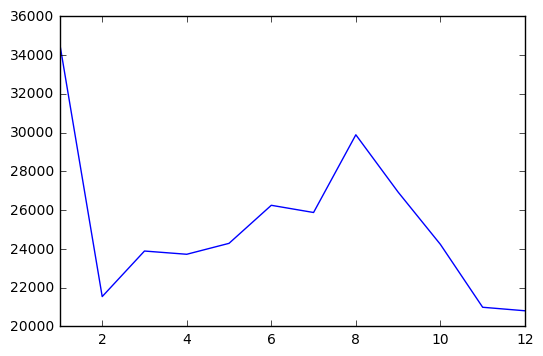

In [7]:
requests_per_month = df.request_date.dt.month.value_counts()
requests_per_month.sort_index().plot()

We can see that January does, indeed, look anomalous. After spiking in January, service requests are low throughout the winter months, increasing as we move into the warmer months and peaking in August, after which they dip down again as we return to winter. 

Let's take a look at what's happening in January. We can focus in on January by selecting the subset of our service requests that came in January. 

In [8]:
jan_requests = df[df.request_date.dt.month==1]
print(jan_requests.request_date.min())
print(jan_requests.request_date.max())

2016-01-01 00:30:30
2016-01-31 23:43:20


Here, we've fed Python a logical statement telling it to return values from df where the date-part month in the column 'request_date' is equal to 1 (or January).

## Exercise 4

To better understand how this works, try taking the command out of the square brackets and running it. What does it return?

In [9]:
df.request_date.dt.month==1

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12         True
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22         True
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
302955    False
302956    False
302957    False
302958    False
302959    False
302960    False
302961    False
302962    False
302963    False
302964    False
302965    False
302966    False
302967    False
302968    False
302969    False
302970    False
302971    False
302972    False
302973    False
302974    False
302975    False
302976    False
302977    False
302978    False
302979    False
302980    False
302981    False
302982    False
302983    False
302984    False
Name: request_date, dtyp

This returns a string of True and False statements. The 'True' values are the ones the DataFrame keeps, and the 'False' ones, it discards. 

Now that we have the January data, let's look at what kinds of requests were being made in January.

## Exercise 5

Get value counts for the service code description from the subsample of January service requests. What where the most common requests?

In [10]:
jan_requests.SERVICECODEDESCRIPTION.value_counts()

Snow/Ice Removal                                        5347
Residential Snow Removal (ServeDC)                      5278
Sidewalk Shoveling Enforcement Exemption                5266
Snow/Ice Removal (Roadways AND Bridge walkways ONLY)    2768
Bulk Collection                                         2352
Parking Enforcement                                     2079
Parking Meter Repair                                    1997
Snow Removal Complaints for Sidewalks                   1030
Streetlight Repair Investigation                         817
Emergency No-Parking Verification                        558
Pothole                                                  543
Trash Collection - Missed                                444
Sanitation Enforcement                                   372
Residential Parking Permit Violation                     357
Abandoned Vehicle - On Public Property                   324
Alley Cleaning                                           309
DMV - Drivers License/ID

The city received a TON of snow removal requests in January 2016, but received very few other requests. It seems that these requests for snow removal are driving the high number of requests in January.


If you were living in the District in January 2016, you'll remember this was the month that Snowzilla hit the city. This was a record-breaking snowstorm that dumped feet of snow on the city from January 22nd to January 23rd. 

Let's take a look at the top request in January, Snow/Ice Removal.

## Exercise 6

Get the subsample of service requests for Snow/Ice Removal. Get the number of requests for each day in January 2016, then plot those requests so we can look at them over the course of the month. 

In [11]:
jan_snow_removal = jan_requests[jan_requests.SERVICECODEDESCRIPTION=='Snow/Ice Removal']

In [12]:
jan_snow_removal.request_date.dt.day.value_counts()

25    1983
24    1123
26    1049
27     322
28     194
21     161
23     159
29     145
20      86
30      65
31      25
22      22
18       5
6        3
19       2
17       1
13       1
5        1
Name: request_date, dtype: int64

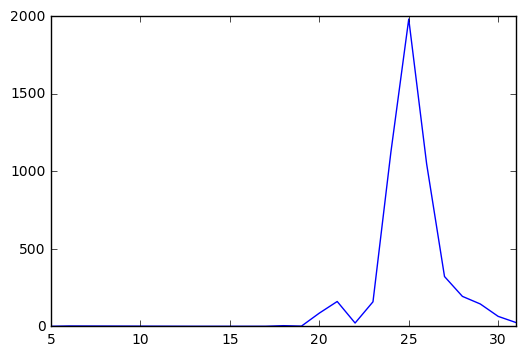

In [13]:
jan_snow_removal.request_date.dt.day.value_counts().sort_index().plot()

We can see that almost all of the requests for snow and ice removal came in the days following Snowzilla.

Now let's take a look at WHERE those requests were coming from. DC is organized into 8 wards. These wards are the largest political geographies in the District. Each ward has a representative on the District Council who is elected directly by the residents of that ward. 

## Exercise 7

Get the number of requests for snow and ice removal from each of the wards in January 2016.

In [14]:
jan_snow_removal.WARD.value_counts()

7.0    1145
8.0     838
5.0     830
4.0     802
3.0     617
6.0     414
1.0     405
2.0     268
Name: WARD, dtype: int64

By far, the most requests for snow and ice removal came from Ward 7, while the fewest (almost a thousand fewer) came from Ward 2. 

Now let's take a look at response times. Ward 7 had the most requests, but is that an indication that the city was slower to plot roads in Ward 7 than it was in other wards?

## Exercise 8

Create a new date column from the resolution date column in our DataFrame of requests for snow and ice removal in January.

In [15]:
jan_snow_removal['resolution_date'] = pd.to_datetime(jan_snow_removal.RESOLUTIONDATE)

C:\Users\peter.casey\AppData\Local\Continuum\Anaconda3\envs\py35\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Because the resolution date comes AFTER the service request, the resolution date will always be 'greater' than the request date. We can get the amount of time took the city to respond to each service request by taking the difference between the resolution date and the request date.

## Exercise 9

Subtract the request date from the resolution date and assign that to an object called "time_diff". Print time_diff.

In [16]:
time_diff = (jan_snow_removal.resolution_date - jan_snow_removal.request_date)
print(time_diff)

106      1 days 15:47:26
201      4 days 11:49:26
211      5 days 08:27:07
218      3 days 14:55:16
219      2 days 17:48:47
222      4 days 08:22:00
223      1 days 18:31:15
224      2 days 17:19:39
225      4 days 08:21:43
226      4 days 08:21:01
227      3 days 13:22:23
228      3 days 05:27:06
229      1 days 18:30:33
231      1 days 18:01:55
232      3 days 03:57:30
233      2 days 15:37:37
234      3 days 15:35:54
241      4 days 02:31:05
242      4 days 01:30:49
244      4 days 01:30:09
245      1 days 06:57:47
246      4 days 01:30:47
247      1 days 06:56:27
249      1 days 06:54:53
251      0 days 07:04:33
252      1 days 06:54:06
254      1 days 06:53:16
255      1 days 06:43:03
256      4 days 01:27:38
257      4 days 01:27:25
              ...       
65804    0 days 07:40:46
65885    2 days 14:29:22
65952    1 days 13:45:32
65955    1 days 13:51:42
65956    4 days 04:48:43
65957    2 days 13:57:41
65959    2 days 12:52:23
65961    1 days 13:50:29
65963    2 days 15:05:02


Great! Now let's convert time_diff to the number of hours it took to respond using the astype function. This function can be used to change the data type of a column. The timedelta64 function lets us convert to the datetime part we're interested in.

In [17]:
time_diff.astype('timedelta64[h]')

106       39.0
201      107.0
211      128.0
218       86.0
219       65.0
222      104.0
223       42.0
224       65.0
225      104.0
226      104.0
227       85.0
228       77.0
229       42.0
231       42.0
232       75.0
233       63.0
234       87.0
241       98.0
242       97.0
244       97.0
245       30.0
246       97.0
247       30.0
249       30.0
251        7.0
252       30.0
254       30.0
255       30.0
256       97.0
257       97.0
         ...  
65804      7.0
65885     62.0
65952     37.0
65955     37.0
65956    100.0
65957     61.0
65959     60.0
65961     37.0
65963     63.0
65964     37.0
65966    100.0
65969     37.0
65970     61.0
65971    100.0
65973     60.0
65974     58.0
66000     91.0
66001    118.0
66002    118.0
66003    118.0
66004    118.0
66009    118.0
66011    104.0
66013     72.0
66017     31.0
66069     63.0
66160     15.0
66162    462.0
66166     57.0
66176     40.0
dtype: float64

## Exercise 10

Create a new column in our DataFrame calls "response_time" that is the time difference between resolution date and request date in hours. 

In [18]:
jan_snow_removal['response_time'] = (jan_snow_removal.resolution_date - jan_snow_removal.request_date).astype('timedelta64[h]')

C:\Users\peter.casey\AppData\Local\Continuum\Anaconda3\envs\py35\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Now that we have our response times, let's use the groupby function to get the average response time by ward.

In [19]:
jan_snow_removal.groupby('WARD').response_time.mean()

WARD
1.0     62.298765
2.0     57.750000
3.0     63.063209
4.0     76.349127
5.0    112.878313
6.0     95.664251
7.0     94.990393
8.0     70.336516
Name: response_time, dtype: float64

This looks a lot like the output from the value_counts function. In fact, value_counts is a type of groupby function that simply returns counts for each of the unique values in a column. 

The groupby function allows us to aggregate the data by the unique values of a column (or multiple columns) and return various statistics, including mean, median, minimum (min), maximum (max), counts, etc.

Again, we have two parts to the output: the index, in this case the ward, and the values, in this case the average hours it to the city to respond to a request for snow and ice removal. The groupby function returns the values sorted by the index. However, we can sort the values by the value using the sort_values function. 

## Exercise 11

Get the average response times by ward again and sort the values by the average response time in ascending order (from highest to lowest). Which ward had the longest response times? Which had the lowest?

In [20]:
jan_snow_removal.groupby('WARD').response_time.mean().sort_values(ascending=False)

WARD
5.0    112.878313
6.0     95.664251
7.0     94.990393
4.0     76.349127
8.0     70.336516
3.0     63.063209
1.0     62.298765
2.0     57.750000
Name: response_time, dtype: float64

Now we know which wards made the most requests for snow and ice removal following the historic snowstorm in January 2016. Why do you think some wards received faster service than others? Do you think you could build a model predicting which requests would receive the fastest response?